In [102]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


train_df=pd.read_csv("fashion-mnist_train.csv")
test_df=pd.read_csv("fashion-mnist_test.csv")

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [104]:
df["label"].describe()

count    10000.000000
mean         4.500000
std          2.872425
min          0.000000
25%          2.000000
50%          4.500000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [105]:
df.shape

(10000, 785)

In [106]:
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [107]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary() 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
history=model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.7271 - loss: 0.7464 - val_accuracy: 0.8685 - val_loss: 0.3802
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8696 - loss: 0.3625 - val_accuracy: 0.8630 - val_loss: 0.3728
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8880 - loss: 0.3083 - val_accuracy: 0.8870 - val_loss: 0.3087
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8979 - loss: 0.2787 - val_accuracy: 0.8997 - val_loss: 0.2781
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9081 - loss: 0.2457 - val_accuracy: 0.8972 - val_loss: 0.2853
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9173 - loss: 0.2233 - val_accuracy: 0.9057 - val_loss: 0.2651
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9255 - loss: 0.2005 - val_accuracy: 0.9062 - val_loss: 0.2618
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9332 - loss: 0.1797 - 

In [109]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9075 - loss: 0.2763
Test accuracy: 0.9100


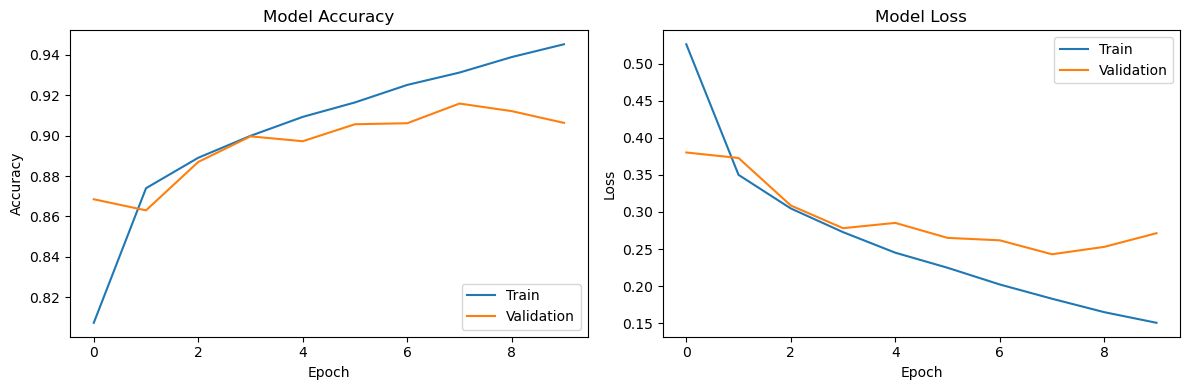

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9075 - loss: 0.2763
Test accuracy: 0.9100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.86      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.88      0.84      0.86      1000
       Dress       0.95      0.86      0.91      1000
        Coat       0.88      0.85      0.87      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.68      0.83      0.75      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



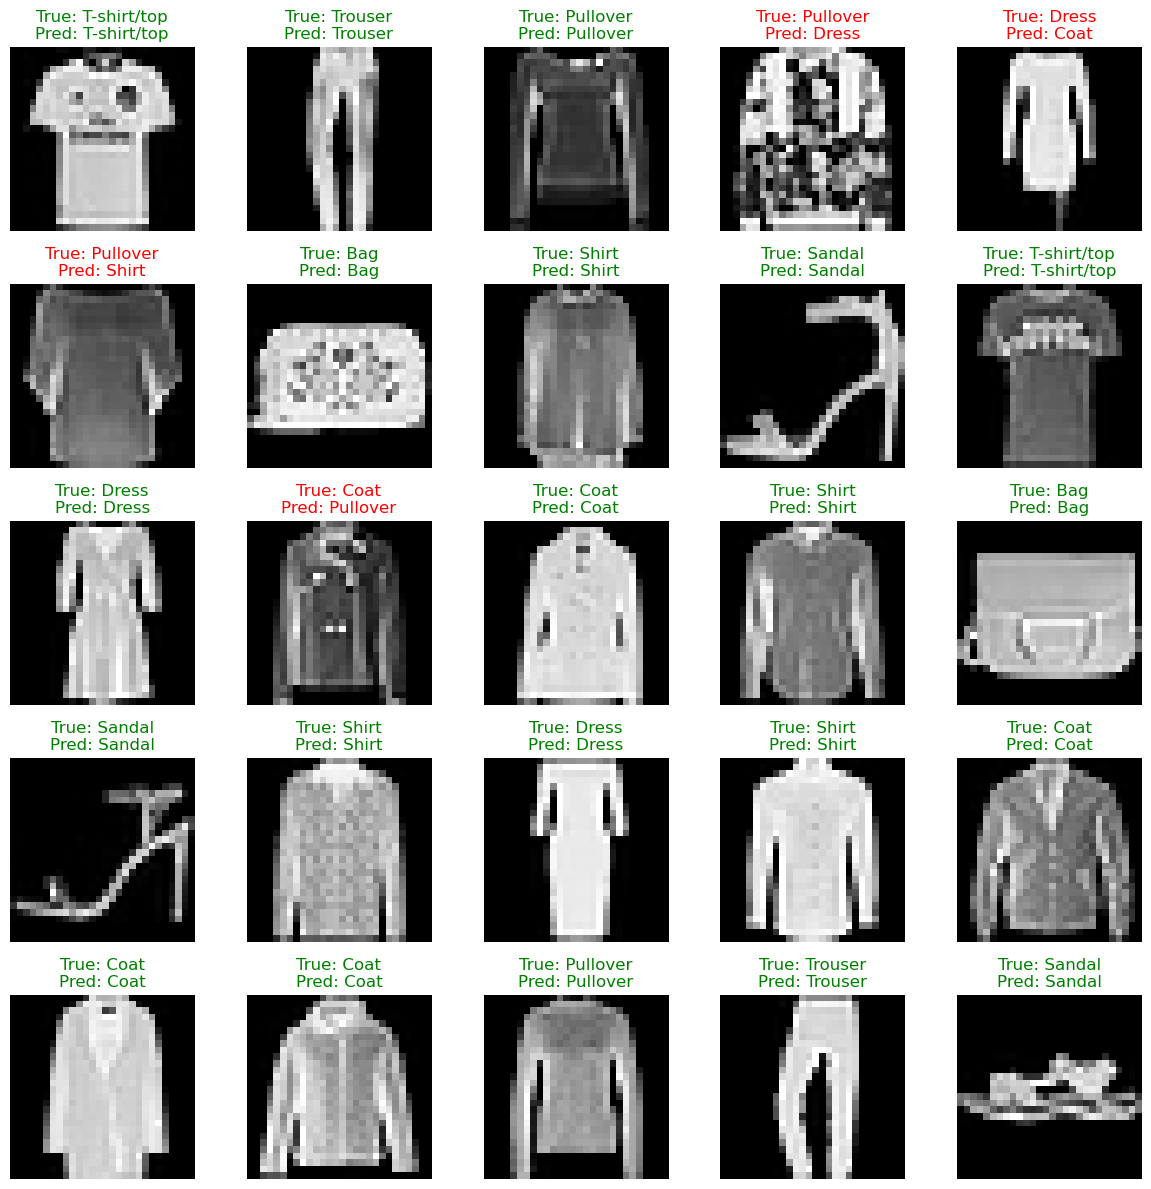

In [111]:
from sklearn.metrics import classification_report

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    predicted_class = class_names[y_pred_classes[i]]
    true_class = class_names[y_true_classes[i]]
    title_color = 'green' if predicted_class == true_class else 'red'
    plt.title(f'True: {true_class}\nPred: {predicted_class}', color=title_color)
    plt.axis('off')
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


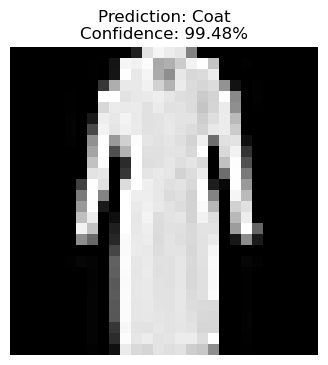

In [128]:
def classify_single_image(image_index):
    img = X_test[image_index]
    
    img_for_pred = img.reshape(1, 28, 28, 1)
    
    pred = model.predict(img_for_pred)
    pred_class = np.argmax(pred)
    confidence = np.max(pred) * 100
    
    plt.figure(figsize=(6, 4))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Prediction: {class_names[pred_class]}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()
random_image_index = np.random.randint(0, len(X_test))
classify_single_image(random_image_index)